# Feature Extraction (Deep Learning Features)

## Part 1

**Author**: Maleakhi Agung Wijaya  
**Email**: maw219@cam.ac.uk  
**Description**: This file contains code for extracting deep learning features. We considered using pre-trained neural networks as feature extractors. In part 1, we do not consider any fine tuning or data augmentation. The fine tuning, augmentation, and the use of autoencoders are discussed in part 2 and 3.

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
import plotly.graph_objects as go
import scipy.io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
import pickle
from scipy.spatial.distance import cdist
from sklearn.decomposition import IncrementalPCA, TruncatedSVD
from sklearn.random_projection import SparseRandomProjection

# Images
import os
import cv2
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.style as style
from skimage.io import imread, imshow
import re

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models, backend as K, callbacks
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

In [12]:
%run Utilities.ipynb

## Load and Preprocess Dataset

This section loads shell images one-by-one and concatenate the forward and rear image.

In [13]:
filenames = sorted(os.listdir(SHELL_IMAGES_DATA))
X_species, y_species = preprocess_x_y(filenames)
le = LabelEncoder()
y_species = le.fit_transform(y_species)

1


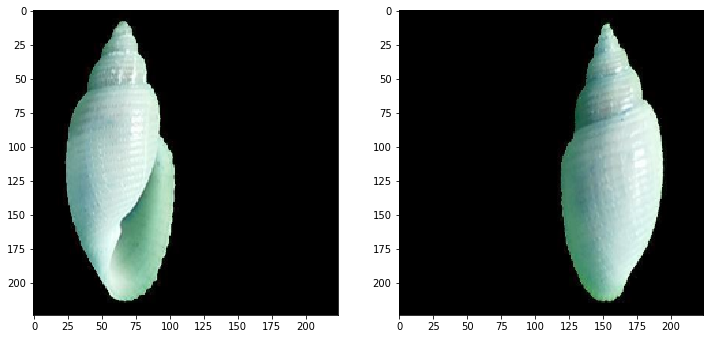

In [4]:
# Test visualise image
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
print(y_species[12])
image1 = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_species[12][0]))
image1 = cv2.resize(image1, (224, 224))
image2 = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_species[12][1]))
image2 = cv2.resize(image2, (224, 224))
ax1.imshow(image1)
ax2.imshow(image2)

plt.show()

## VGG16

This section load the VGG16 architecture with Imagenet weight to be used as feature extractor.

In [5]:
VGG_model = VGG16(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

In [6]:
# Set non trainable in our case
for layer in VGG_model.layers:
    layer.trainable=False

In [7]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# Get outputs from various layers of neural networks
# Convolutional block
block1_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block1_pool").output)
block2_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block2_pool").output)
block3_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block3_pool").output)
block4_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block4_pool").output)
block5_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("block5_pool").output)

# Dense block
fc1_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("fc1").output)
fc2_model = Model(inputs=VGG_model.input, 
                    outputs=VGG_model.get_layer("fc2").output)

### Feature Extraction

We extract features using pre-trained VGG16. We consider each convolutional and dense blocks as feature extraction. We aim to compare their performance.

**A**

In [9]:
# Store features
X_features_block1_a = []
X_features_block2_a = []
X_features_block3_a = []
X_features_block4_a = []
X_features_block5_a = []
X_features_fc1_a = []
X_features_fc2_a = []

In [10]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[0] # A position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (224, 224))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 224, 224, 3))
    
    # Block 1 - fc
#     X_features_block1_a.append(block1_model.predict(image_a).flatten())
#     X_features_block2_a.append(block2_model.predict(image_a))
#     X_features_block3_a.append(block3_model.predict(image_a))
#     X_features_block4_a.append(block4_model.predict(image_a))
#     X_features_block5_a.append(block5_model.predict(image_a))
    
#     X_features_fc1_a.append(fc1_model.predict(image_a))
#     X_features_fc2_a.append(fc2_model.predict(image_a))

In [ ]:
## Save objects
# np.save("../results/vgg16_block2a.pickle", X_features_block2_a)
# np.save("../results/vgg16_block3a.pickle", X_features_block3_a)
# save_object(X_features_block4_a, "../results/vgg16_block4a.pickle")
# save_object(X_features_block5_a, "../results/vgg16_block5a.pickle")

# save_object(X_features_fc1_a, "../results/vgg16_fc1a.pickle")
# save_object(X_features_fc2_a, "../results/vgg16_fc2a.pickle")

In [12]:
# # Load objects
# vgg16_block2a = np.load("../results/vgg16_block2a.pickle.npy")
# vgg16_block3a = np.load("../results/vgg16_block3a.pickle.npy")
# vgg16_block4a = load_object("../results/vgg16_block4a.pickle")
# vgg16_block5a = load_object("../results/vgg16_block5a.pickle")
# vgg16_fc1a = load_object("../results/vgg16_fc1a.pickle")
# vgg16_fc2a = load_object("../results/vgg16_fc2a.pickle")

**B**

In [9]:
X_features_block1_b = []
X_features_block2_b = []
X_features_block3_b = []
X_features_block4_b = []
X_features_block5_b = []
X_features_fc1_b = []
X_features_fc2_b = []

In [10]:
### This cells only for extracting A (cannot do both at the same time,
# memory issue)
for X in tqdm(X_species):
    X_a = X[1] # B position
    
    # Open the image in gray scale
    image_a = cv2.imread(os.path.join(SHELL_IMAGES_DATA, X_a), cv2.IMREAD_COLOR)
    
    # Preprocess the image
    image_a = cv2.resize(image_a, (224, 224))
    
    image_a = cv2.cvtColor(image_a, cv2.COLOR_RGB2BGR)
    image_a = image_a / 255.0
    image_a = np.reshape(image_a, (-1, 224, 224, 3))
    
    # Block 1 - fc
#     X_features_block1_b.append(block1_model.predict(image_a))
#     X_features_block2_b.append(block2_model.predict(image_a))
#     X_features_block3_b.append(block3_model.predict(image_a))
#     X_features_block4_b.append(block4_model.predict(image_a))
#     X_features_block5_b.append(block5_model.predict(image_a))
    
#     X_features_fc1_b.append(fc1_model.predict(image_a))
#     X_features_fc2_b.append(fc2_model.predict(image_a))

In [11]:
## Save objects
# np.save("../results/vgg16_block2b.pickle", X_features_block2_b)
# np.save("../results/vgg16_block3b.pickle", X_features_block3_b)
# save_object(X_features_block4_b, "../results/vgg16_block4b.pickle")
# save_object(X_features_block5_b, "../results/vgg16_block5b.pickle")

# save_object(X_features_fc1_b, "../results/vgg16_fc1b.pickle")
# save_object(X_features_fc2_b, "../results/vgg16_fc2b.pickle")

In [38]:
# # Load objects
# # vgg16_block2b = np.load("../results/vgg16_block2b.pickle.npy")
# # vgg16_block3b = np.load("../results/vgg16_block3b.pickle.npy")
# vgg16_block4b = load_object("../results/vgg16_block4b.pickle")
# vgg16_block5b = load_object("../results/vgg16_block5b.pickle")
# vgg16_fc1b = load_object("../results/vgg16_fc1b.pickle")
# vgg16_fc2b = load_object("../results/vgg16_fc2b.pickle")

### Further Preprocessing

We further preprocessing the extracted features for later to be used for classification.

**Block3**

We load features extracted when using block3 VGG16 outputs as the deep learning feature representation.

In [8]:
vgg16_block3b = load_object("../results/vgg16_block3b.pickle")
vgg16_block3a = load_object("../results/vgg16_block3a.pickle")

# Reshape 
X_block3a = np.reshape(vgg16_block3a, (1340, -1))
X_block3b = np.reshape(vgg16_block3b, (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block3a = pca.fit_transform(X_block3a)
X_block3b = pca.fit_transform(X_block3b)

# Check shape
print(X_block3a.shape)
print(X_block3b.shape)

# Concatenate A and B and save object
X_block3 = np.concatenate((X_block3a, X_block3b), axis=1)
# save_object(X_block3, "../results/X_block3_vgg16.pickle")

(1340, 1117)
(1340, 1103)


In [27]:
# Load
X_block3 = load_object("../results/X_block3_vgg16.pickle")
scaler = StandardScaler()
X_block3_scaled = scaler.fit_transform(X_block3)

**Block4**

We load features extracted when using block4 VGG16 outputs as the deep learning feature representation.

In [19]:
vgg16_block4b = load_object("../results/vgg16_block4b.pickle")
vgg16_block4a = load_object("../results/vgg16_block4a.pickle")

# Reshape 
X_block4a = np.reshape(np.array(vgg16_block4a), (1340, -1))
X_block4b = np.reshape(np.array(vgg16_block4b), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block4a = pca.fit_transform(X_block4a)
X_block4b = pca.fit_transform(X_block4b)

# Check shape
print(X_block4a.shape)
print(X_block4b.shape)

# Concatenate A and B and save object
X_block4 = np.concatenate((X_block4a, X_block4b), axis=1)
# save_object(X_block4, "../results/X_block4_vgg16.pickle")

(1340, 422)
(1340, 395)


In [28]:
# Load
X_block4 = load_object("../results/X_block4_vgg16.pickle")
scaler = StandardScaler()
X_block4_scaled = scaler.fit_transform(X_block4)

**Block5**

We load features extracted when using block5 VGG16 outputs as the deep learning feature representation.

In [5]:
vgg16_block5b = load_object("../results/vgg16_block5b.pickle")
vgg16_block5a = load_object("../results/vgg16_block5a.pickle")

# Reshape 
X_block5a = np.reshape(np.array(vgg16_block5a), (1340, -1))
X_block5b = np.reshape(np.array(vgg16_block5b), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_block5a = pca.fit_transform(X_block5a)
X_block5b = pca.fit_transform(X_block5b)

# Check shape
print(X_block5a.shape)
print(X_block5b.shape)

# Concatenate A and B and save object
X_block5 = np.concatenate((X_block5a, X_block5b), axis=1)
# save_object(X_block5, "../results/X_block5_vgg16.pickle")

In [29]:
# Load
X_block5 = load_object("../results/X_block5_vgg16.pickle")
scaler = StandardScaler()
X_block5_scaled = scaler.fit_transform(X_block5)

**FC1**

We load features extracted when using FC1 VGG16 outputs as the deep learning feature representation.

In [15]:
vgg16_fc1b = load_object("../results/vgg16_fc1b.pickle")
vgg16_fc1a = load_object("../results/vgg16_fc1a.pickle")

# Reshape 
X_fc1b = np.reshape(np.array(vgg16_fc1b), (1340, -1))
X_fc1a = np.reshape(np.array(vgg16_fc1a), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_fc1a = pca.fit_transform(X_fc1a)
X_fc1b = pca.fit_transform(X_fc1b)

# Check shape
print(X_fc1a.shape)
print(X_fc1b.shape)

# Concatenate A and B and save object
X_fc1 = np.concatenate((X_fc1a, X_fc1b), axis=1)
# save_object(X_fc1, "../results/X_fc1_vgg16.pickle")

(1340, 61)
(1340, 59)


In [30]:
# Load
X_fc1 = load_object("../results/X_fc1_vgg16.pickle")
scaler = StandardScaler()
X_fc1_scaled = scaler.fit_transform(X_fc1)

**FC2**

We load features extracted when using FC2 VGG16 outputs as the deep learning feature representation.

In [17]:
vgg16_fc2b = load_object("../results/vgg16_fc2b.pickle")
vgg16_fc2a = load_object("../results/vgg16_fc2a.pickle")

# Reshape 
X_fc2b = np.reshape(np.array(vgg16_fc2b), (1340, -1))
X_fc2a = np.reshape(np.array(vgg16_fc2a), (1340, -1))

# Dimensionality reduction using PCA as we have too many
# features at the moment.
pca = PCA(n_components=.9)
X_fc2a = pca.fit_transform(X_fc2a)
X_fc2b = pca.fit_transform(X_fc2b)

# Check shape
print(X_fc2a.shape)
print(X_fc2b.shape)

# Concatenate A and B and save object
X_fc2 = np.concatenate((X_fc2a, X_fc2b), axis=1)
# save_object(X_fc2, "../results/X_fc2_vgg16.pickle")

(1340, 31)
(1340, 30)


In [31]:
# Load
X_fc2 = load_object("../results/X_fc2_vgg16.pickle")
scaler = StandardScaler()
X_fc2_scaled = scaler.fit_transform(X_fc2)

### Classification

#### Standard ML Models

In [32]:
## Hyperparameter configurations and result storage
param_grid_svc = {
    # random search varying the parameter
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': ["scale", "auto"], 
    'kernel': ["rbf", "linear"]
}

param_grid_rf = { 
    'n_estimators': [10, 100, 200],
    'criterion' :['gini', 'entropy']
}

# Used to store results for different feature sets
list_dict_results = []

In [34]:
## Loop configuration
feature_sets = [
    (X_block3, y_species),
    (X_block3_scaled, y_species),
    (X_block4, y_species),
    (X_block4_scaled, y_species),
    (X_block5, y_species),
    (X_block5_scaled, y_species),
    (X_fc1, y_species),
    (X_fc1_scaled, y_species),
    (X_fc2, y_species),
    (X_fc2_scaled, y_species),
]
feature_sets_name = [
    "Block 3",
    "Block 3 scaled",
    "Block 4",
    "Block 4 scaled",
    "Block 5",
    "Block 5 scaled",
    "FC1",
    "FC1 scaled",
    "FC2",
    "FC2 scaled",
]

## Classifier and hyperparameter loops
param_grids = [param_grid_svc, param_grid_rf]
classifiers_name = ["svc", "rf"]
classifiers = [SVC(), RandomForestClassifier()]
cmaps = ["plasma", "viridis"]

**************************************************
Block 3
------------------------------
svc
Accuracy: 0.953731343283582
F1: 0.949957356076759


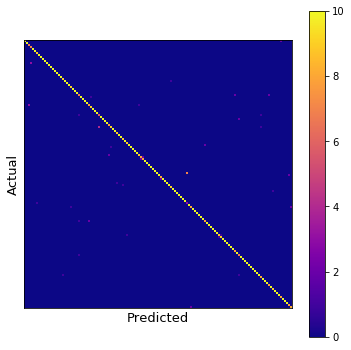


------------------------------
rf


KeyboardInterrupt: 

In [35]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    # Iterate over different classifiers
    for classifier, classifier_name, param_grid, cmap in zip(classifiers, 
                                                             classifiers_name, 
                                                             param_grids,
                                                             cmaps):
        print("-"*30)
        print(classifier_name)

        list_acc, list_cm, list_f1, list_cv_results = nested_cv_sklearn(classifier, param_grid, X, y, 5)
        # Add data to dict_results
        dict_results["accuracy"].append(list_acc)
        dict_results["f1"].append(list_f1)
        dict_results["cv_results"].append(list_cv_results)
        dict_results["cm"].append(list_cm)

        # Display accuracy, f1, confusion matrix
        print(f"Accuracy: {np.mean(list_acc)}")
        print(f"F1: {np.mean(list_f1)}")
        cm = sum(list_cm)

        plot_confusion_matrix(cm, cmap=cmap)

        print()
    
    list_dict_results.append(dict_results)

#### Neural Networks

In [ ]:
## Loop configuration
feature_sets = [
    (X_block3, y_species),
    (X_block3_scaled, y_species),
    (X_block4, y_species),
    (X_block4_scaled, y_species),
    (X_block5, y_species),
    (X_block5_scaled, y_species),
    (X_fc1, y_species),
    (X_fc1_scaled, y_species),
    (X_fc2, y_species),
    (X_fc2_scaled, y_species),
]
feature_sets_name = [
    "Block 3",
    "Block 3 scaled",
    "Block 4",
    "Block 4 scaled",
    "Block 5",
    "Block 5 scaled",
    "FC1",
    "FC1 scaled",
    "FC2",
    "FC2 scaled",
]

In [ ]:
# Neural network configuration (simple one for standard)
# see more complex version on utilities.ipynb that are evaluated
# on other files.
optimizer = keras.optimizers.Adam()
batch_size = 64
no_epochs = 200

In [ ]:
## Evaluation
# Iterate over different feature sets
for feature_set , feature_set_name in zip(feature_sets, feature_sets_name):

    print("*"*50)
    print(feature_set_name)
    
    X = feature_set[0]
    y = feature_set[1]
    
    dict_results = generate_dict_results()
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    
    # Neural network training
    X = np.array(X)
    y = np.array(y)
    
    # Simple model definition
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(134, activation="softmax"),
        ]
    )
    
    for train, test in kfold.split(X, y):
        model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])
        
        # Valid data
        valid_range = int(0.1 * len(train))
        valid = train[:valid_range]
        train = train[valid_range:]
        
        # Early stopping callbacks
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0, patience=50,
            mode="auto", restore_best_weights=False
        )
        
        # Fit data to model
        history = model.fit(X[train], y[train],
                  batch_size=batch_size,
                  epochs=no_epochs, verbose=0, 
                  validation_data=(X[valid], y[valid]),
                  callbacks=[early_stopping])
        
        # Generate generalisation metrics
        pred = model.predict(X[test])
        pred = np.argmax(pred, axis=1)
        cm = confusion_matrix(pred, y[test])
        acc = accuracy_score(pred, y[test])
        f1 = f1_score(pred, y[test], average="macro")
        
        # Add data to dict results
        dict_results["accuracy"].append(acc)
        dict_results["f1"].append(f1)
        dict_results["cm"].append(cm)
        
    # Display accuracy, f1, confusion matrix
    print(f"Accuracy: {np.mean(dict_results['accuracy'])}")
    print(f"F1: {np.mean(dict_results['f1'])}")
    plot_confusion_matrix(sum(dict_results['cm']), cmap="cividis")

    print()

    list_dict_results.append(dict_results)